<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/02_Okt_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pointbiserialr
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

In [29]:
# Load the "Adult" dataset from OpenML
adult = fetch_openml(name='adult', version=2, as_frame=True)
adult_data = adult.frame

# Data Preparation: Encode binary variables and filter relevant columns
adult_df = adult_data[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'sex', 'class']].copy()

# Encode 'sex' as binary (0 = Female, 1 = Male)
adult_df['sex'] = adult_df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Encode 'class' as binary (0 = <=50K, 1 = >50K)
adult_df['class'] = adult_df['class'].apply(lambda x: 1 if x == '>50K' else 0)


In [30]:
adult_df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,sex,class
0,25,7,40,0,0,1,0
1,38,9,50,0,0,1,0
2,28,12,40,0,0,1,1
3,44,10,40,7688,0,1,1
4,18,10,30,0,0,0,0


In [33]:
y = adult_df['class']
X = adult_df.drop('class', axis=1)
column = X.columns

The column sex is not numeric, skipping it.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



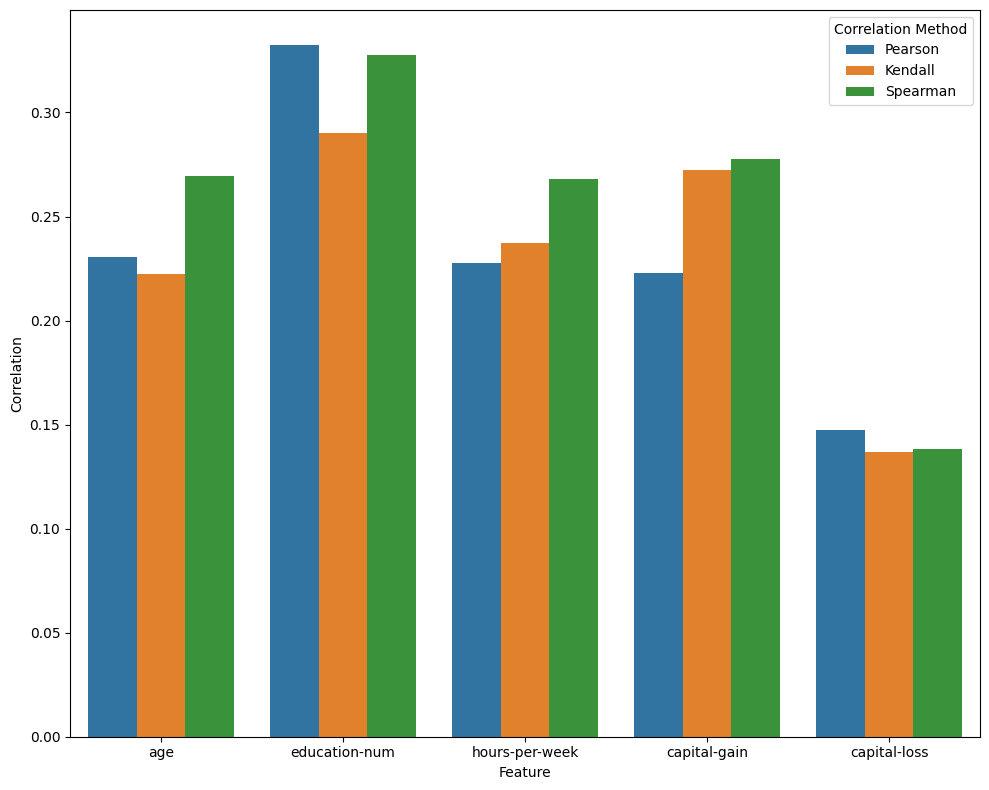

In [40]:
correlations = []
for col in column:
    if pd.api.types.is_numeric_dtype(adult_df[col]):
        pearson_corr = adult_df[col].corr(adult_df['class'])
        kendall_corr = adult_df[col].corr(adult_df['class'], method='kendall')
        spearman_corr = adult_df[col].corr(adult_df['class'], method='spearman')

        correlations.append({
            'Feature': col,
            'Correlation Method': 'Pearson',
            'Correlation': pearson_corr
        })
        correlations.append({
            'Feature': col,
            'Correlation Method': 'Kendall',
            'Correlation': kendall_corr
        })
        correlations.append({
            'Feature': col,
            'Correlation Method': 'Spearman',
            'Correlation': spearman_corr
        })
    else:
        print(f"The column {col} is not numeric, skipping it.")

corr_df = pd.DataFrame(correlations)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Feature', y='Correlation', hue='Correlation Method', data=corr_df, ax=ax)

plt.tight_layout()
plt.show()


In [46]:
corrrs = {'col': [], 'p_c': [], 'p_value': []}

for col in column:
    p_c, p_value = pointbiserialr(X[col], y)
    print(f"{col}:\n\t p-value = {p_value}, corelation = {p_c}")

    corrrs['col'].append(col)
    corrrs['p_c'].append(p_c)
    corrrs['p_value'].append(p_value)

age:
	 p-value = 0.0, corelation = 0.23036946784752083
education-num:
	 p-value = 0.0, corelation = 0.33261313066614606
hours-per-week:
	 p-value = 0.0, corelation = 0.22768676056081386
capital-gain:
	 p-value = 0.0, corelation = 0.22301302085823543
capital-loss:
	 p-value = 8.543599059676636e-236, corelation = 0.14755448819939265
sex:
	 p-value = 0.0, corelation = 0.21462803456392626


In [53]:
cor_df = pd.DataFrame(corrrs)

In [49]:
px.bar(cor_df, x='col', y='p_c')

In [55]:
corrrs = {'col': [], 'metric': [], 'value': []}

for col in column:
    p_c, p_value = pointbiserialr(X[col], y)

    corrrs['col'].append(col)
    corrrs['metric'].append('p_value')
    corrrs['value'].append(p_value)

    corrrs['col'].append(col)
    corrrs['metric'].append('p_c')
    corrrs['value'].append(p_c)

In [59]:
corr_df = pd.DataFrame(corrrs)

px.bar(corr_df, x='col', y='value', color='metric')

In [62]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='col', x=corr_df['col'], y=corr_df['value'])
])
fig.update_layout(
    title='Correlation Methods',
    xaxis_title='Correlation Method',
    yaxis_title='Correlation',
    barmode='group'
)

fig.show()


In [66]:
fig = px.bar(corr_df, x='col', y='value', color='metric', barmode='group',
             title='Correlation Methods for Different Features')
fig.show()